In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import f1_score
from sklearn import tree

In [2]:
df = pd.read_csv("Kmeans.csv")

In [3]:
df

,X (Latitude),Y (Longitude),District_Name,Name_of_Police_Station,NH/ SH/ Other Road,Location,Starting From (KM),Ending (KM),No. of Accident,No. of Fatalities,cluster,Accident Severity
0,18.504207,73.921399,Pune City,Hadapsar,NH-65,Vaidyawadi Chowk,00 mtr.,500 mtr.,15,3,1,1.0
1,18.475402,73.958490,Pune City,Hadapsar,NH-65,Fursungi Fata,00 mtr.,500 mtr.,9,4,1,1.0
2,18.466391,73.978883,Pune City,Hadapsar,NH-965,"Fursungi Railway Bridge,Saswad Road",00 mtr.,500 mtr.,11,5,1,1.0
3,18.513016,73.933366,Pune City,Hadapsar,NH-04,IBM Company Saswad Road,00 mtr.,500 mtr.,7,1,1,1.0
4,18.433087,73.838014,Pune City,Bharti Vidhyapith Road,NH-04,Dari Pull,00 mtr.,500 mtr.,11,8,1,1.0
5,18.485432,73.799690,Pune City,Warje,NH-04,Mai Mangeshkar Hospital,100 mtr.,500 mtr.,14,12,0,2.0
6,18.475023,73.809431,Pune City,Warje,NH-04,Mutha River Bridge,50 mtr,100 mtr.,7,7,1,1.0
7,18.503095,73.792889,Pune City,Warje,NH-04,Dukkar Khind,100 mtr.,500 mtr.,9,5,1,1.0
8,18.461084,73.822208,Pune City,Sinhgadh,NH-04,Navale Bridge,00 mtr.,500 mtr.,30,17,2,3.0
9,18.448896,73.833281,Pune City,Sinhgadh,NH-04,Bhumkar Pull,00 mtr.,500 mtr.,15,9,0,2.0


In [4]:
X = df[['No. of Accident','No. of Fatalities']]
y = df['Accident Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rcf = RandomForestClassifier(max_depth=20, n_estimators= 80, random_state= 42)

# Train the classifier
rcf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=80, random_state=42)

[Text(0.5, 0.9, 'x[1] <= 7.5\ngini = 0.556\nsamples = 29\nvalue = [27, 11, 7]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 18\nvalue = [26, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 27.0\ngini = 0.526\nsamples = 11\nvalue = [1, 11, 7]'),
 Text(0.5, 0.5, 'x[1] <= 8.5\ngini = 0.153\nsamples = 8\nvalue = [1, 11, 0]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= 13.0\ngini = 0.375\nsamples = 3\nvalue = [1, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 8, 0]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 7]')]

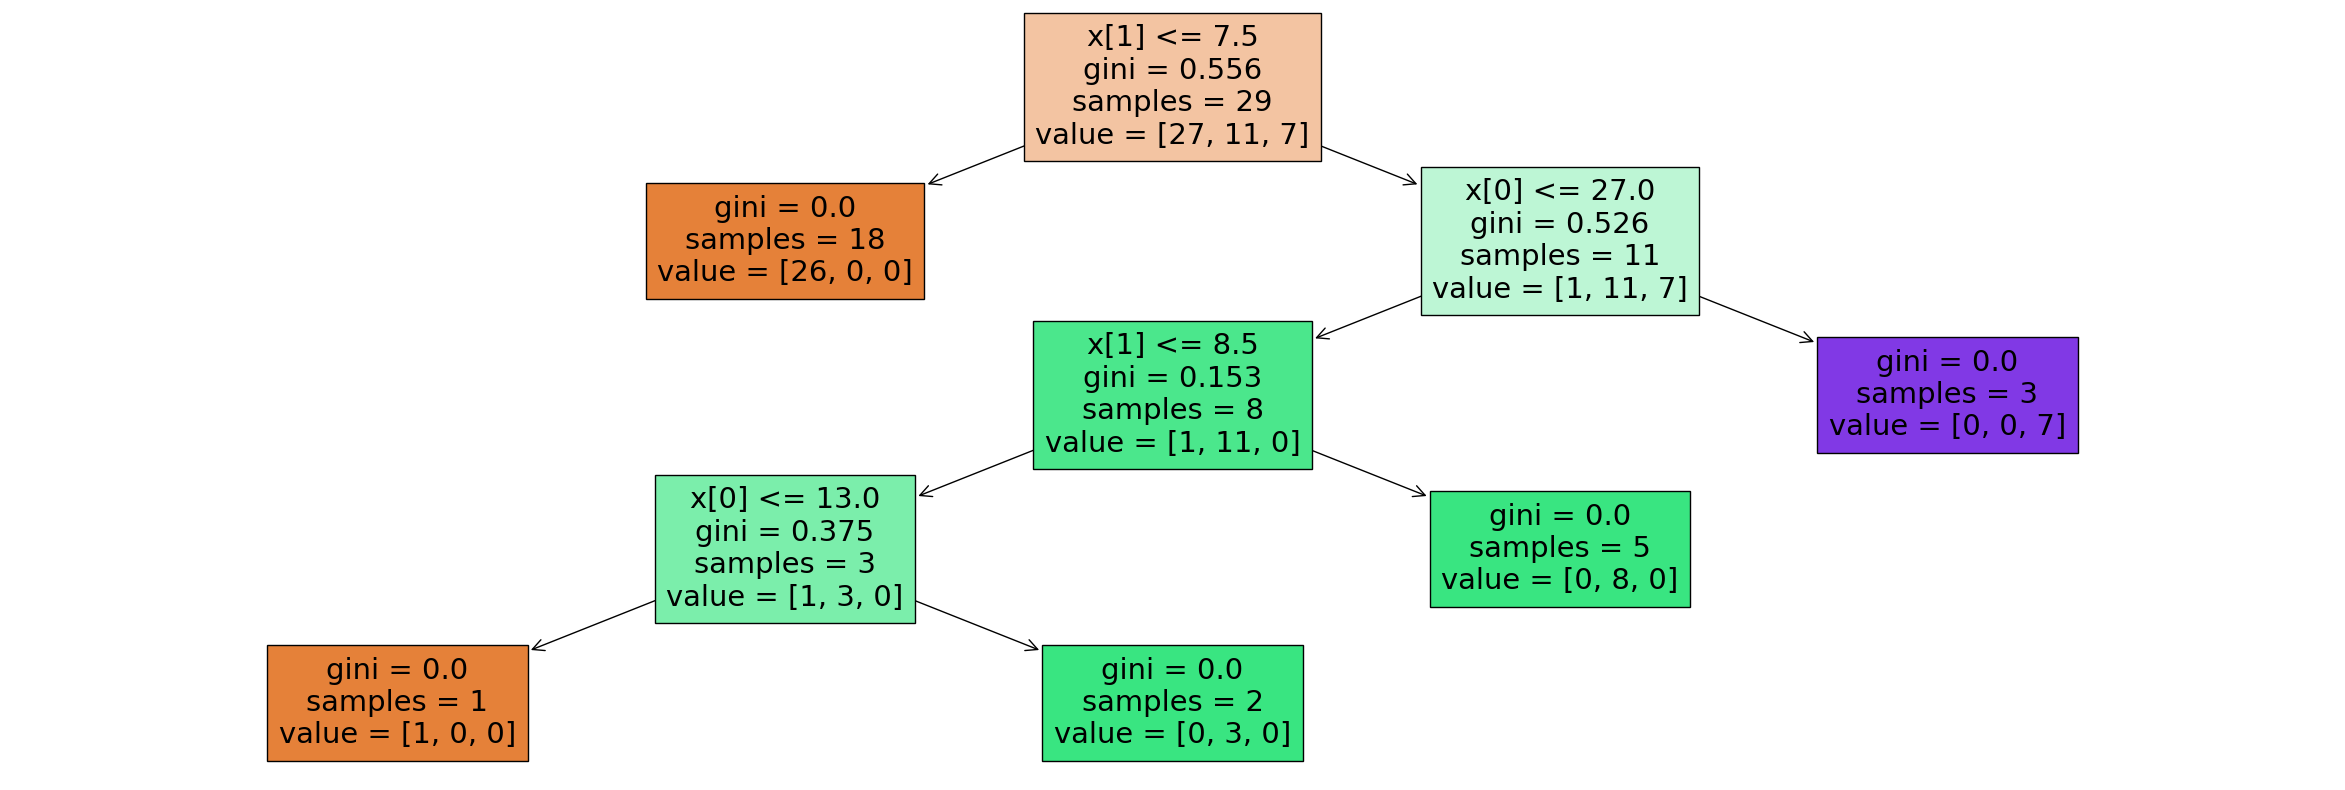

In [6]:
plt.figure(figsize=(30,10))
tree.plot_tree(rcf.estimators_[0],filled=True)

In [7]:
y_pred = rcf.predict(X_test)
y_pred

array([2., 2., 1., 1., 1., 3., 2., 2., 1., 1., 1., 1.])

In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.83
Precision: 0.92
Recall: 0.83
F1 Score: 0.84


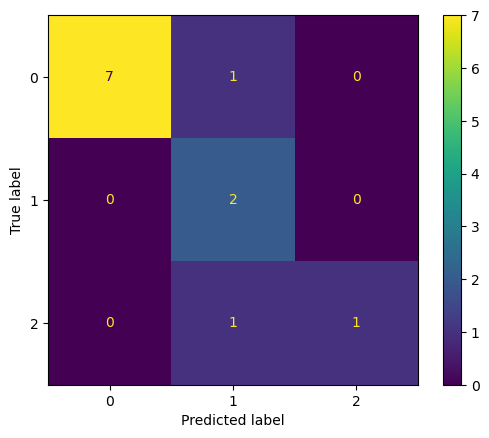

In [9]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [10]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
             'random_state':randint(20,100)}




# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rcf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=20,
                                                    n_estimators=80,
                                                    random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022DDC602A50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022DDA245CD0>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022DDC634E90>})

In [11]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 156, 'random_state': 90}


In [12]:
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=156, random_state=90)

In [13]:
y_pred = best_rf.predict(X_test)
y_pred

array([1., 2., 1., 1., 1., 3., 2., 2., 1., 1., 1., 1.])

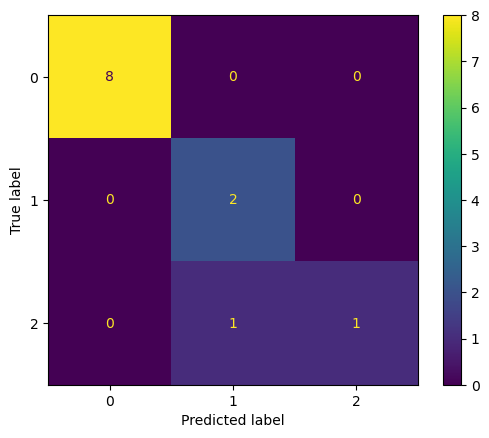

In [14]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.92
Precision: 0.94
Recall: 0.92
F1 Score: 0.91


In [16]:
import joblib

# Assuming you have trained a Random Forest classifier and stored it in rf_classifier

# Save the model to a file/
joblib.dump(best_rf, 'randomfc.pkl')

['randomfc.pkl']